ここでは
- 連続型確率分布
- 確率分布のパラメータ推定
- 微分


について扱います。

# 連続型確率分布
前回の説明では、確率分布とは起こりうる結果が$X=x_1,x_2,\ldots,x_n$と有限通りの場合に
$P(X=x_1),\ldots,P(X=x_n)$として$0$以上の数をその和が$1$となるように分布させたものだった。

しかし、起こりうると想定する結果が有限でないこともありうる。
そのような時にどう考えればよいか。

例えば、コインを$N$回投げ表の出た回数の割合$X=\dfrac{k}{N}$の確率分布を考えよう。
$N$を大きくしたときに思い切ってこれを曲線だと思うことにしよう。
この場合には、$P(a\leq X\leq b)$はその曲線と$x$軸の間の面積と思うことができる。

一般に、確率変数$X$が連続分布に従うとき、密度関数と呼ばれる関数$f(x)$があって$P(a\leq X\leq b)$は$f(x)$と$x$軸で囲まれた部分の面積として与えられる。
この面積を表す記号として
$$
\int^b_af(x)dx
$$
を定める。
大体$\int dx$と$\sum$は同じようなもの。

 
$f(x)=\sqrt{1-x^2}$として
$$
\int^1_{-1}f(x)dx
$$
を次のように計算してみよう。
まず幅$d$を適当にとり、区間$[-1,1]$を長さ$d$ごとに分割した点を$x[i]$とする。
$d\times f(x[i])$が細長い長方形の面積を与えるので、$i$を動かして足し合わせれば、曲線が囲む面積が近似できる。

In [13]:
import math
def f(x):
    return math.sqrt(1-x**2)

N = 1000
d = 2/N
2 * sum([d*f(-1+d*i) for i in range(N)])

3.141487477002142

### 一様分布
例えば$0$以上$1$以下の実数が一様に現れるような確率分布を考えたい。
このとき特定の値を取る確率、例えば$P(x=0.5)$は$0$としないとおかしなことになる。
$$
f(x)=
\begin{cases}
1 & 0\leq x\leq 1\\
0 & x<0, 1<x
\end{cases}
$$
という密度関数を考えると、例えば$P(0.5\leq x\leq 0.6)=0.1$となる。

 
$-1\leq x\leq 1$なる実数が一様に現れる確率分布を考える。
これを与える密度関数$f(x)$はどのようなものになるか。
またこのとき
 
- $P(-0.2\leq X\leq 0.3)$
- $P(-0.6\leq X\leq -0.2)$
- $P(0.5\leq X\leq 2)$
 
を求めよ。

## 正規分布

コインを$N$回投げる操作を考えた時$N$を大きくしていくと、
数え上げのヒストグラムがどんどん細かくなる。
思い切ってこれを曲線だと思うことにしよう。
つまり、確率変数は今までのような飛び飛びの値ではなく、ぎっしり詰まった（ある範囲の）数すべてを取ることになる。
したがって、特にある決まった値をとる確率$P(X=k)$は$0$になってしまうことに注意。

連続分布の場合、$P(a\leq X\leq b)$のように範囲を指定して確率を計算する。
またこの時、この確率の値は曲線と$x$軸で囲まれた部分の面積になる。

二項分布の極限は正規分布になる。
正規分布$N(\mu,\sigma)$
の密度関数$f(x)$は
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$
という式で与えられる。
これは$x=\mu$がピークで左右対称。
この式で表現される曲線の面積として、確率分布が与えられる。

正規分布は誤差の分布として使われる。
色々と良い性質を持ち、もっとも基本的な連続分布。
正規分布についてはまた改めて取り上げます。

#### 指数関数
$f(x)=\exp(x)$について。
$$
\exp(x+y)=\exp(x)\exp(y)\\
\exp'(x)=\exp(x)\\
\exp(0)=1
$$
をみたす関数を指数関数という。

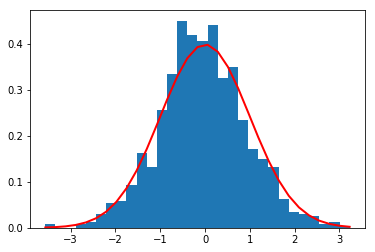

In [4]:
#正規分布に従う乱数の生成
import numpy as np

mu, sigma, N=0, 1.0, 1000
s=np.random.normal(mu,sigma,N)#標準正規分布に従う乱数をサンプル数100で生成

import matplotlib.pyplot as plt
count, bins, ignored=plt.hist(s,30,density=True)#上のサンプルのヒストグラム
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=2,color='r')#正規分布の確率密度関数
plt.show()

### 多変数の連続分布
例えば二つの確率変数$X, Y$を同時に考えたい場合、二変数の密度関数$f(x,y)$を与えることで確率分布を記述する。このとき
$$
P(a\leq X\leq b, c\leq Y\leq d)=\int^b_a\int^d_cf(x,y)dxdy
$$
として確率分布が与えられる。

$$
f(x)=\int^\infty_{-\infty}f(x,y)dy
$$
とすれば$X$の密度関数が得られる。
これは離散分布の場合に
$$
P(X=x)=\sum_iP(X=x, Y=y_i)
$$
としたのと同じこと。

またこの場合に条件付き分布は密度関数
$$
f(y\mid x)=\frac{f(x,y)}{f(x)}
$$
として
$$
P(c\leq Y\leq d\mid X=x)=\int^d_cf(y\mid x)dy
$$
により確率が与えられる。

連続分布に対してもベイズの定理が成り立つ。
$$
f(y\mid x)=\frac{f(x\mid y)f(y)}{\int^\infty_{-\infty} f(x\mid y)f(y)dy}
$$

### 二変数正規分布

密度関数は
$$
f(x)=\frac{1}{(\sqrt{2\pi})^m\sqrt{\det\Sigma}}\exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))
$$

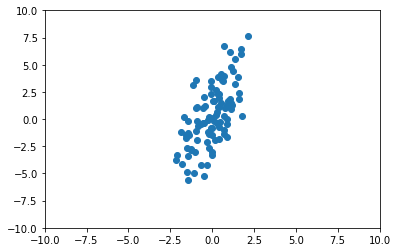

In [15]:
#二変数正規分布のサンプリング
import numpy as np
mean = [0, 0]
cov = [[1, 2], [2, 10]]
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.scatter(x, y)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# パラメータの推定
ここでは次のような問題を考える。
 
コイン投げを100回やって表の出た回数が60回だった。
このコインの表の出る確率$p$はいくつと考えられるか？
 

次の二つの方法について以下で説明します。
 
- 最尤推定
- ベイズ推定とMAP推定
 

最尤法は尤度関数と呼ばれる関数$L(p)$を設定し、その最大値を与える$p$を答える。

ベイズ推定では$p$の確率分布を推定する。
つまり最大になる$p$だけではなく、$p$の分布を決める。

連続分布のベイズの定理
$$
p(\theta\mid x)=\frac{p(x\mid\theta)p(\theta)}{\int p(x\mid\theta)p(\theta)d\theta}
$$

### 二項分布のパラメータ推定
はじめにあげた例題を考える。
$P(\mbox{表})=p$として60回表が出る確率$L(p)$を計算すると、前に見たように
$$
L(p)=
\begin{pmatrix}
100\\
60
\end{pmatrix}
p^{60}(1-p)^{40}
$$
となる。
これが最も大きくなるのは$p$がいくつの時か？

上の関数のグラフを書け。
また最大値近くの$p$の値を幾つか計算して、いつ$L(p)$が最大になるのか予測せよ。
 
このようにしてはじめの問いに答えるのが最尤法の考え方。
まずは10回中6回表だったとしてみよう。

[6.561000e-07 2.621440e-05 1.750329e-04]


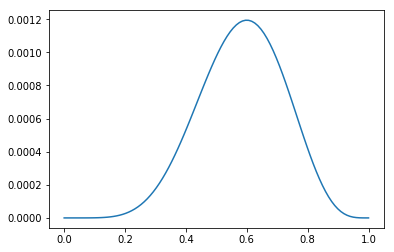

In [25]:
def L(p):
    return p**6*(1-p)**4

vL = np.vectorize(L)
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,1,100), vL(np.linspace(0,1,100)))

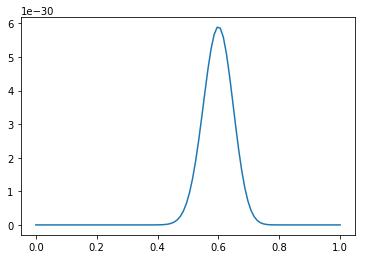

In [26]:
def L(p):
    return p**60*(1-p)**40

import matplotlib.pyplot as plt

vL = np.vectorize(L)
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,1,100), vL(np.linspace(0,1,100)))

例えばコインを5回投げて0回表だったとして、上の方法で表の出る確率$p$を最尤法で推定しよう。
$$
L(p)=
\begin{pmatrix}
5\\
0
\end{pmatrix}
p^0(1-p)^5
$$
であり、これが最大になるのは$p=0$の時。

### MAP推定とベイズ推定

ここでベイズ推定の考え方を導入する。
考え方としては表がk回出たという条件のもとで$p$がいくつになる確率が高いか、
あるいは$p$が満たすべき確率分布（前の記号を使えば$P(p\mid k)$のようなもの）を求める。
「確率の確率」だから紛らわしいが、単に身長が幾つになる確率、とか体重が幾つになる確率、のようなものだと思えばよい。

$p=0$から$p=1$まで$0.01$刻みで101枚のコインがあって、どれか？という問題はベイズの定理を使える。
考え方としては表がk回出たという条件のもとで$p$がいくつになる確率が高いか、
あるいは$p$が満たすべき確率分布（前の記号を使えば$P(p\mid k)$のようなもの）を求める。
「確率の確率」だから紛らわしいが、単に身長が幾つになる確率、とか体重が幾つになる確率、のようなものだと思えばよい。

これはベイズの定理を使えば$p(k\mid p)p(p)$を計算すればよく、
$p(k\mid p)=L(p)$は上で計算した通り。

事前分布$p(p)$をいろいろ設定して考えよう。
例えば0から1までの一様分布にしてみると、実は最尤法と何も変わらない。

事前分布としてベータ分布を使う。
$$
Be(\alpha,\beta)(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{\int^1_0x^{\alpha-1}(1-x)^{\beta-1}dx}
=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{C}
$$
を$x$の関数、$\alpha, \beta$は新たなパラメータだと思うことにする。
この最大値は$x=\dfrac{\alpha-1}{\alpha+\beta-2}$の時（ただし$\alpha,\beta>1$とする）で、期待値は$\dfrac{\alpha}{\alpha+\beta}$である。
この分母は面積を1にするため（確率分布の条件）の定数なので、今回はあまり気にしないでよい。
この$x$の関数を密度関数に持つ確率分布をベータ分布という。
例えば$Be(1,1)$は一様分布である。

$p(p)=Be(\alpha,\beta)(p)$とした時の事後分布は
$p(\theta\mid k)=p^{\alpha-1}(1-p)^{\beta-1}\times p^k(1-p)^{N-k}=p^{\alpha+k-1}(1-p)^{\beta+N-k-1}$
となるので、また（定数倍を無視すれば）ベータ分布になる。

 
同じ事前分布$Be(\alpha,\beta)$を与えた時に、1回だけコインを投げた時と、100回投げた時で、事後分布への影響はどのように違うか。
また事前分布の違いによる影響はコインを投げた回数とどう関係があるか。
 

最尤法とMAP推定/ベイズ推定の違い。
どちらも同じ$p$が最適としても、分布の違いにより次の更新への影響が違う。
つまり、最尤法だと「今までの知識」が役に立たない。
一方で事前分布をどう設定するかというところで恣意性が出る。

MAPとベイズ推測の違い！ベイズ推測は事後確率出してからパラメータで積分してxの分布を予測するもの。

今の例で、二項分布とベータ分布のような関係にある確率分布のことを自然な共役分布という。

### 多項分布のパラメータ推定
上の問題を多項分布にして考えてみる。
サイコロを$K$回振った結果$i=1,2,3,4,5,6$の目が$k_i$回出た。
この時の$i$出る確率をそれぞれ$p=(p_i)$とし、$L(p)=L(p_1,p_2,p_3,p_4,p_5,p_6)$を計算しよう。
尤度関数は
$$
L(p)=p(k\mid p)=\frac{N!}{\prod_i(k_i!)}\prod_ip_i^{k_i}
$$
となる。

まずは最尤法でやろう。
尤度関数を最大にする$p$は、この場合$p_i=\dfrac{k_i}{K}$となることがわかる。
直感的にはなりそうなので納得する。

事前分布を設定してベイズ推定しよう。
今度はベータ分布ではなくディリクレ分布を使う。
ベータ分布の多変数版と思ってよい。
$$
Dir(\alpha_1,\ldots,\alpha_6)(x_1,\ldots,x_6)=\frac{\Gamma(A)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_k)}\prod_ix_i^{\alpha_i-1}
$$
にしておく。変なのがくっついているけど、これも面積を1にするための定数。
$\alpha_i$が新たなパラメータで$x$の関数だと思うことにする。

事前分布をディリクレ分布とした時、事後分布はどのようになるか計算せよ

サイコロじゃなくて、1から$N$までの数字が書いてあるボールがたくさん箱に入っているとする。
同じ数字がたくさんあってもよいとする。
$K$回ボールを取り出して、$i$番のボールが$k_i$回出たという観測を元に、箱の中のボールの分布$p_i$を調べたい。
$N$がすごく大きくて$K$が小さい場合、ほとんどの$i$が$0$回出現。
最尤推定すると、これらの確率が0ということになってしまう。

これを回避するために事前分布を設定する。
事前分布としてディリクレ分布$Dir(\alpha_1,\ldots,\alpha_N)(p_1,\ldots,p_N)$を採用すると、
尤度関数が
$$
L(p)=p(k\mid p)=\frac{N!}{\prod_i(k_i!)}\prod_ip_i^{k_i}
$$
となることから、
事後分布は
$$
p(p\mid k)=L(p)Dir(\alpha)(p)=C\prod_{i=1}^Np_i^{\alpha_i+k_i-1}
$$
となる。
従って、これもまたディリクレ分布に従う。

この関数の最大値は
$$
p_i=\dfrac{k_i+\alpha_i-1}{K+A-N}
$$
の時に取る。ここで$A$は$\alpha_i$の和

これを特に$\alpha$を全て2にした時の最大値が、いわゆるラプラススムージング。
推定値が$\dfrac{k_i+1}{K+N}$となる。
事前情報がある場合は一様でない事前分布を設定しても良い。